## Experiment 6 - MNSIT Digit Classification Using Keras

## Problem Statement:
To perform Convolutional Neural Networks for Image Classification on MNIST Dataset.

## Installing Dependencies:

In [1]:
! pip install tabulate, numpy, pandas, matplotlib, seaborn

ERROR: Invalid requirement: 'tabulate,'


## Code

In [2]:
# Task 1: Import Libraries
# Import necessary libraries for data handling and visualization
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os

In [3]:

# Task 2: Load and Preprocess Data
# Load MNIST data and normalize to facilitate efficient training
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28*28).astype("float32") / 255
x_test = x_test.reshape(10000, 28*28).astype("float32") / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


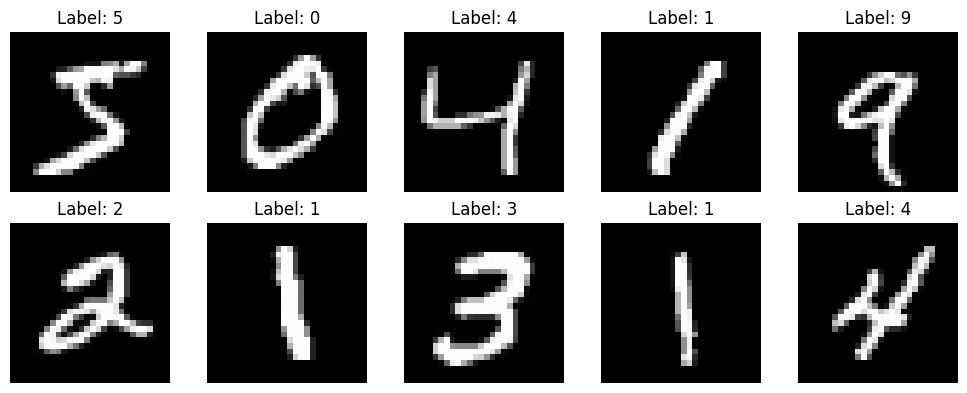

In [4]:

# Task 3: Visualize the Data
# Display the first 10 images from the dataset to understand the data better
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [5]:

# Task 4: Define and Compile the Model
# Set up the neural network structure and compile the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation="relu", input_shape=(28*28,)),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

c:\Users\mainp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:

# Task 5: Train the Model
# Train the model using the training data and validate using part of it
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8686 - loss: 0.4597 - val_accuracy: 0.9657 - val_loss: 0.1218
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9604 - loss: 0.1304 - val_accuracy: 0.9685 - val_loss: 0.1031
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9778 - loss: 0.0771 - val_accuracy: 0.9760 - val_loss: 0.0806
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9835 - loss: 0.0564 - val_accuracy: 0.9808 - val_loss: 0.0686
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9888 - loss: 0.0390 - val_accuracy: 0.9817 - val_loss: 0.0668


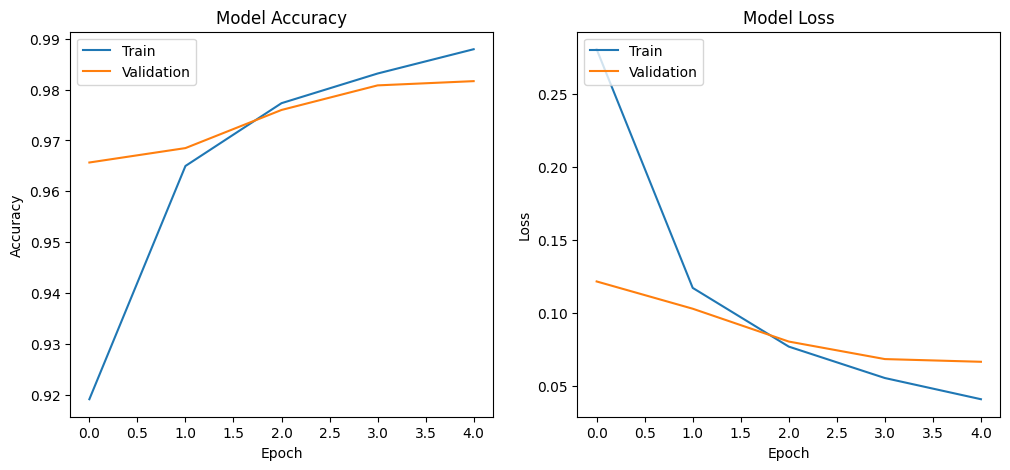

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9754 - loss: 0.0796
Test accuracy: 0.9781000018119812


In [7]:


# Task 6: Evaluate Model Performance
# Plot accuracy and loss graphs to review the training and validation performance
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model on test data and print the test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")





313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


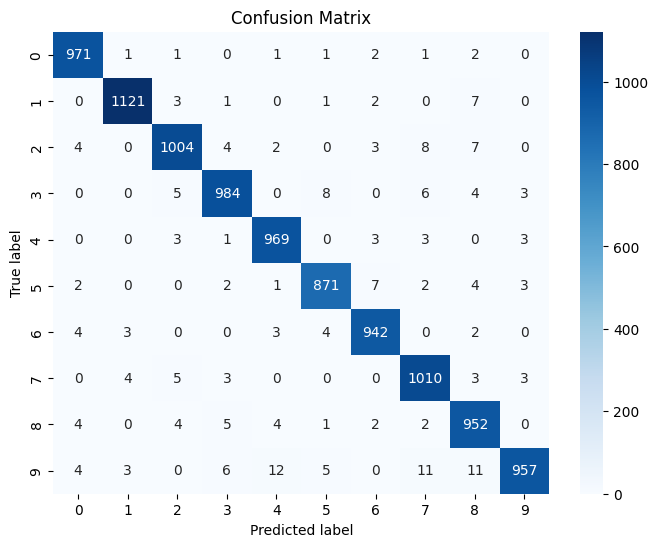

In [8]:
# Task 7: Analyze Errors with a Confusion Matrix
# Generate predictions, calculate the confusion matrix, and visualize it
preds = model.predict(x_test)
pred_classes = np.argmax(preds, axis=1)
cm = confusion_matrix(y_test, pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

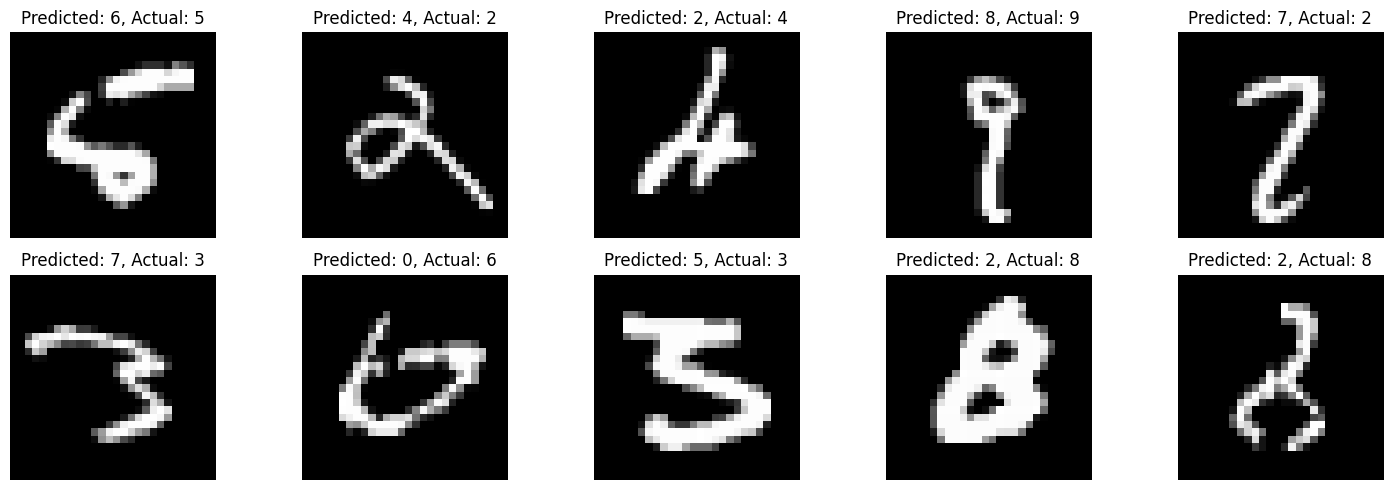

In [9]:
# Task 8: Visualize Misclassifications
# Display images that were misclassified to analyze potential reasons
misclassified_idxs = np.where(pred_classes != y_test)[0]
plt.figure(figsize=(15, 5))
for i, mis_idx in enumerate(misclassified_idxs[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[mis_idx].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {pred_classes[mis_idx]}, Actual: {y_test[mis_idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
